In [1]:
import pandas as pd
import numpy as np

# Load community data

In [2]:
community_data = pd.read_pickle('community_data.pkl')

In [3]:
df_communities = community_data['Communities']

df_communities.shape

(1741, 2)

In [4]:
df_communities_filtered = community_data['Communities_filtered']

df_communities_filtered.shape

(264, 2)

In [5]:
community_user_data = pd.read_pickle('community_users_data.pkl')

df_community_users = community_user_data['Users']

df_community_users.shape

(484252, 2)

# Load user likes data

In [6]:
likes_data = pd.read_pickle('user_activity_data_likes.pkl')

df_likes = likes_data['likes']

df_likes.head()

,User_Id,Post_Id
0,yasinde,e/2d4fcaed2d2a4ac1a36571b66da3f16c
1,socialnewsturkey,e/2d4fcaed2d2a4ac1a36571b66da3f16c
2,janzu,e/2d4fcaed2d2a4ac1a36571b66da3f16c
3,mugecerman,e/2d4fcaed2d2a4ac1a36571b66da3f16c
4,miocaro,e/2d4fcaed2d2a4ac1a36571b66da3f16c


# Load user posts data

In [7]:
posts = pd.read_pickle('user_activity_data_posts.pkl')

df_posts = posts['posts']

df_posts.shape

(10864613, 3)

# Load comments data

In [8]:
comments = pd.read_pickle('user_activity_data_comments.pkl')

df_comments = comments['comments']

df_comments['Post_Id'] = df_comments['Post_Id'].str.split('/c/').str[0]

df_comments.shape

(2851230, 4)

In [9]:
df_comments.head()

,Post_Id,Entry_Id,Posted_By,Source_Name
0,e/ed12adf025b5491da54c4ff2c8c5377a,e/ed12adf025b5491da54c4ff2c8c5377a,koenigdublin,NaN
2,e/624ca9226b6526ebdb69f9b46df482c7,e/624ca9226b6526ebdb69f9b46df482c7,guardianuk,NaN
3,e/2fdf59e075094fe1847137af34eda0f7,e/2fdf59e075094fe1847137af34eda0f7,nahi,m.ctor.org
4,e/4d8de05f989d43a4b90bfbfc59751e1c,e/4d8de05f989d43a4b90bfbfc59751e1c,miocaro,NaN
5,e/967b4db48fa74021b24ccbc93c55a61c,e/967b4db48fa74021b24ccbc93c55a61c,massoptimization,Bookmarklet


# Gather user posts info

In [10]:
df_user_posts = df_posts.groupby('User_Id')['Post_Id'].count().reset_index().rename({ 'Post_Id': 'Post_Count' }, axis = 1)

In [11]:
df_user_posts

,User_Id,Post_Count
0,000,15
1,0000ff,21
2,00043,119
3,001ppua,521
4,0034,3
...,...,...
207005,zzzoot,1
207006,zzzrbyte,4
207007,zzzsleep,14
207008,zzztimbo,20


In [12]:
df_liked_by_user = df_likes.groupby('User_Id')['Post_Id'].count().reset_index().rename({ 'Post_Id': 'Liked_By_Count' }, axis=1)

In [13]:
df_liked_by_user

,User_Id,Liked_By_Count
0,0046aki,2
1,009257558963,8
2,09358179942,117
3,0bpm,1
4,0m4r,1
...,...,...
15076,zxb888,2
15077,zyban,2
15078,zyzyzhangyuan,1
15079,zzgraph,167


In [14]:
df_commented_by_user = df_comments.groupby('Posted_By')['Post_Id'].count().reset_index().rename({ 'Posted_By': 'User_Id' }, axis=1)

In [15]:
df_commented_by_user

,User_Id,Post_Id
0,009257558963,2
1,0157h7,19
2,02blog,151
3,06blog,301
4,06live,36
...,...,...
40964,zziuni,9
40965,zznob,3
40966,zzomrot,3
40967,zzver,1


In [16]:
df_community_activity_summary = df_community_users.merge(df_user_posts, how='left', on='User_Id').groupby('Community')['Post_Count'].sum().reset_index().rename({ 'Post_Count': 'Posted_By' }, axis=1)

In [17]:
df_community_activity_summary = df_community_activity_summary.merge(df_community_users.merge(df_liked_by_user, how='left', on='User_Id').groupby('Community')['Liked_By_Count'].sum().reset_index(), on='Community')

In [18]:
df_community_activity_summary = df_community_activity_summary.merge(df_community_users.merge(df_commented_by_user, how='left', on='User_Id').groupby('Community')['Post_Id'].sum().reset_index(), on='Community').rename({ 'Post_Id': 'Commented_By_Count'}, axis=1 )

In [19]:
df_community_activity_summary = df_community_activity_summary.merge(df_community_users.groupby('Community').count().reset_index(), on='Community').rename({ 'User_Id': 'Member_Count' }, axis=1)

In [20]:
df_community_activity_summary

,Community,Posted_By,Liked_By_Count,Commented_By_Count,Member_Count
0,0,1615967.0,60367.0,244986.0,147071
1,1,880080.0,1777.0,80597.0,46218
2,2,587640.0,226470.0,1094901.0,45581
3,3,1373673.0,2452.0,76966.0,44992
4,4,1006219.0,1066.0,76880.0,43015
...,...,...,...,...,...
1736,1736,15.0,0.0,15.0,2
1737,1737,113.0,0.0,0.0,2
1738,1738,23.0,0.0,0.0,2
1739,1739,7.0,0.0,0.0,2


In [21]:
df_community_activity_summary['Posted_By_Per_Member'] = df_community_activity_summary['Posted_By'] / df_community_activity_summary['Member_Count']
df_community_activity_summary['Liked_By_Per_Member'] = df_community_activity_summary['Liked_By_Count'] / df_community_activity_summary['Member_Count']
df_community_activity_summary['Commented_By_Per_Member'] = df_community_activity_summary['Commented_By_Count'] / df_community_activity_summary['Member_Count']

In [22]:
df_community_activity_summary

,Community,Posted_By,Liked_By_Count,Commented_By_Count,Member_Count,Posted_By_Per_Member,Liked_By_Per_Member,Commented_By_Per_Member
0,0,1615967.0,60367.0,244986.0,147071,10.987666,0.410462,1.665767
1,1,880080.0,1777.0,80597.0,46218,19.041932,0.038448,1.743844
2,2,587640.0,226470.0,1094901.0,45581,12.892214,4.968518,24.020996
3,3,1373673.0,2452.0,76966.0,44992,30.531494,0.054499,1.710660
4,4,1006219.0,1066.0,76880.0,43015,23.392282,0.024782,1.787284
...,...,...,...,...,...,...,...,...
1736,1736,15.0,0.0,15.0,2,7.500000,0.000000,7.500000
1737,1737,113.0,0.0,0.0,2,56.500000,0.000000,0.000000
1738,1738,23.0,0.0,0.0,2,11.500000,0.000000,0.000000
1739,1739,7.0,0.0,0.0,2,3.500000,0.000000,0.000000


In [23]:
df_community_activity_summary.describe()

,Community,Posted_By,Liked_By_Count,Commented_By_Count,Member_Count,Posted_By_Per_Member,Liked_By_Per_Member,Commented_By_Per_Member
count,1741.000000,1.741000e+03,1741.000000,1.741000e+03,1741.000000,1741.000000,1741.000000,1741.000000
mean,870.000000,6.240444e+03,307.924182,1.637697e+03,278.145893,16.756801,0.041990,1.642051
std,502.727726,8.781745e+04,6823.728291,3.133559e+04,4302.898210,75.284535,0.740128,18.324766
min,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000
25%,435.000000,2.000000e+00,0.000000,0.000000e+00,2.000000,1.000000,0.000000,0.000000
50%,870.000000,7.000000e+00,0.000000,0.000000e+00,2.000000,3.000000,0.000000,0.000000
75%,1305.000000,2.800000e+01,0.000000,0.000000e+00,3.000000,10.750000,0.000000,0.000000
max,1740.000000,2.277536e+06,226470.000000,1.094901e+06,147071.000000,1586.500000,26.000000,436.500000


In [24]:
df_community_activity_profile = df_community_activity_summary[['Community', 'Posted_By_Per_Member', 'Liked_By_Per_Member', 'Commented_By_Per_Member']]

In [25]:
df_community_activity_profile.describe()

,Community,Posted_By_Per_Member,Liked_By_Per_Member,Commented_By_Per_Member
count,1741.000000,1741.000000,1741.000000,1741.000000
mean,870.000000,16.756801,0.041990,1.642051
std,502.727726,75.284535,0.740128,18.324766
min,0.000000,0.000000,0.000000,0.000000
25%,435.000000,1.000000,0.000000,0.000000
50%,870.000000,3.000000,0.000000,0.000000
75%,1305.000000,10.750000,0.000000,0.000000
max,1740.000000,1586.500000,26.000000,436.500000


In [26]:

df_community_activity_features = df_community_activity_summary[['Posted_By_Per_Member', 'Liked_By_Per_Member', 'Commented_By_Per_Member']]

In [27]:
df_community_activity_features

,Posted_By_Per_Member,Liked_By_Per_Member,Commented_By_Per_Member
0,10.987666,0.410462,1.665767
1,19.041932,0.038448,1.743844
2,12.892214,4.968518,24.020996
3,30.531494,0.054499,1.710660
4,23.392282,0.024782,1.787284
...,...,...,...
1736,7.500000,0.000000,7.500000
1737,56.500000,0.000000,0.000000
1738,11.500000,0.000000,0.000000
1739,3.500000,0.000000,0.000000


# Cluster communities based on activities

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_community_activity_features)

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score

In [30]:
K = 4 # k >= D + 1

eps_list = [0.01, 0.02, 0.03, 0.05, 0.06, 0.1, 0.175, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

for eps in eps_list:
    dfscan_clustering_test = DBSCAN(eps=eps, min_samples=K).fit(X_scaled)
    dfscan_clustering_test.labels_

    dbscan_test_score = davies_bouldin_score(X_scaled, dfscan_clustering_test.labels_)

    print(f"For eps: {eps}, the score is {dbscan_test_score}, labels: {len(set(dfscan_clustering_test.labels_))}")

For eps: 0.01, the score is 1.9912787123370208, labels: 4
For eps: 0.02, the score is 1.7782946851198047, labels: 4
For eps: 0.03, the score is 1.3449079865533853, labels: 2
For eps: 0.05, the score is 1.2775726215763883, labels: 2
For eps: 0.06, the score is 1.2775726215763883, labels: 2
For eps: 0.1, the score is 1.2437776499754707, labels: 2
For eps: 0.175, the score is 1.1679310869096302, labels: 2
For eps: 0.15, the score is 1.1679310869096302, labels: 2
For eps: 0.2, the score is 0.7603250859265037, labels: 3
For eps: 0.25, the score is 0.7603250859265037, labels: 3
For eps: 0.3, the score is 0.2981355008370783, labels: 4
For eps: 0.35, the score is 0.3073999149587437, labels: 3
For eps: 0.4, the score is 0.01789126677699815, labels: 2
For eps: 0.45, the score is 0.01789126677699815, labels: 2


In [31]:
eps = 0.3

dfscan_clustering = DBSCAN(eps=eps, min_samples=K).fit(X_scaled)
dbscan_labels = dfscan_clustering.labels_

davies_bouldin_score(X_scaled, dbscan_labels)

0.2981355008370783

In [32]:
set(dbscan_labels)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

In [33]:
df_community_activity_summary['Cluster'] = dbscan_labels

In [34]:
df_community_activity_summary

,Community,Posted_By,Liked_By_Count,Commented_By_Count,Member_Count,Posted_By_Per_Member,Liked_By_Per_Member,Commented_By_Per_Member,Cluster
0,0,1615967.0,60367.0,244986.0,147071,10.987666,0.410462,1.665767,0
1,1,880080.0,1777.0,80597.0,46218,19.041932,0.038448,1.743844,0
2,2,587640.0,226470.0,1094901.0,45581,12.892214,4.968518,24.020996,0
3,3,1373673.0,2452.0,76966.0,44992,30.531494,0.054499,1.710660,0
4,4,1006219.0,1066.0,76880.0,43015,23.392282,0.024782,1.787284,0
...,...,...,...,...,...,...,...,...,...
1736,1736,15.0,0.0,15.0,2,7.500000,0.000000,7.500000,0
1737,1737,113.0,0.0,0.0,2,56.500000,0.000000,0.000000,0
1738,1738,23.0,0.0,0.0,2,11.500000,0.000000,0.000000,0
1739,1739,7.0,0.0,0.0,2,3.500000,0.000000,0.000000,0


In [35]:
df_community_activity_summary.groupby('Cluster')[['Community', 'Posted_By_Per_Member', 'Liked_By_Per_Member', 'Commented_By_Per_Member']].agg(['mean', 'min', 'max'])

Community             Posted_By_Per_Member                       \
                mean   min   max                 mean     min          max   
Cluster                                                                      
-1        615.000000    10  1220            17.369554     8.5    26.239109   
 0        870.087811     0  1740            13.117621     0.0   605.500000   
 1        516.750000   129  1118           260.187500     7.0   437.000000   
 2       1312.750000  1175  1617          1347.875000  1155.5  1586.500000   

        Liked_By_Per_Member                       Commented_By_Per_Member  \
                       mean        min        max                    mean   
Cluster                                                                     
-1                20.526200  15.052399  26.000000               27.324885   
 0                 0.018401   0.000000   4.968518                0.777678   
 1                 0.050000   0.000000   0.200000              364.500000   
 2                 0.000000   0.000000   0.000000                0.000000   

                            
           min         max  
Cluster                     
-1        13.5   41.149769  
 0         0.0  118.500000  
 1       282.0  436.500000  
 2         0.0    0.000000

In [36]:
df_community_activity_summary[['Community', 'Posted_By_Per_Member', 'Liked_By_Per_Member', 'Commented_By_Per_Member']].describe()

,Community,Posted_By_Per_Member,Liked_By_Per_Member,Commented_By_Per_Member
count,1741.000000,1741.000000,1741.000000,1741.000000
mean,870.000000,16.756801,0.041990,1.642051
std,502.727726,75.284535,0.740128,18.324766
min,0.000000,0.000000,0.000000,0.000000
25%,435.000000,1.000000,0.000000,0.000000
50%,870.000000,3.000000,0.000000,0.000000
75%,1305.000000,10.750000,0.000000,0.000000
max,1740.000000,1586.500000,26.000000,436.500000


In [37]:
df_community_activity_summary[df_community_activity_summary['Cluster'] == -1][['Community', 'Posted_By_Per_Member', 'Liked_By_Per_Member', 'Commented_By_Per_Member', 'Cluster']]

,Community,Posted_By_Per_Member,Liked_By_Per_Member,Commented_By_Per_Member,Cluster
10,10,26.239109,15.052399,41.149769,-1
1220,1220,8.500000,26.000000,13.500000,-1


In [38]:
df_community_activity_summary[df_community_activity_summary['Cluster'] == 0][['Community', 'Posted_By_Per_Member', 'Liked_By_Per_Member', 'Commented_By_Per_Member', 'Cluster']]

,Community,Posted_By_Per_Member,Liked_By_Per_Member,Commented_By_Per_Member,Cluster
0,0,10.987666,0.410462,1.665767,0
1,1,19.041932,0.038448,1.743844,0
2,2,12.892214,4.968518,24.020996,0
3,3,30.531494,0.054499,1.710660,0
4,4,23.392282,0.024782,1.787284,0
...,...,...,...,...,...
1736,1736,7.500000,0.000000,7.500000,0
1737,1737,56.500000,0.000000,0.000000,0
1738,1738,11.500000,0.000000,0.000000,0
1739,1739,3.500000,0.000000,0.000000,0


In [39]:
df_community_activity_summary[df_community_activity_summary['Cluster'] == 1][['Community', 'Posted_By_Per_Member', 'Liked_By_Per_Member', 'Commented_By_Per_Member', 'Cluster']]

,Community,Posted_By_Per_Member,Liked_By_Per_Member,Commented_By_Per_Member,Cluster
129,129,7.00,0.2,282.0,1
186,186,372.75,0.0,359.5,1
634,634,437.00,0.0,436.5,1
1118,1118,224.00,0.0,380.0,1


In [40]:
df_community_activity_summary[df_community_activity_summary['Cluster'] == 2][['Community', 'Posted_By_Per_Member', 'Liked_By_Per_Member', 'Commented_By_Per_Member', 'Cluster']]

,Community,Posted_By_Per_Member,Liked_By_Per_Member,Commented_By_Per_Member,Cluster
1175,1175,1212.5,0.0,0.0,2
1176,1176,1437.0,0.0,0.0,2
1283,1283,1155.5,0.0,0.0,2
1617,1617,1586.5,0.0,0.0,2


In [47]:
def interpretation_label(cluster):
        if cluster == -1:
            return "Noise"
        elif cluster == 0:
            return "Low-engagement posting communities"
        elif cluster == 1:
            return "Discussion-focused communities"
        elif cluster == 2:
            return "Posting-only or isolated communities"
        else:
            return "Unknown cluster"

In [48]:
df_cluster_activity_summary = df_community_activity_summary.groupby('Cluster').mean().reset_index()[['Cluster', 'Posted_By_Per_Member', 'Liked_By_Per_Member', 'Commented_By_Per_Member']]

In [49]:
df_cluster_activity_summary

,Cluster,Posted_By_Per_Member,Liked_By_Per_Member,Commented_By_Per_Member
0,-1,17.369554,20.526200,27.324885
1,0,13.117621,0.018401,0.777678
2,1,260.187500,0.050000,364.500000
3,2,1347.875000,0.000000,0.000000


In [50]:
df_cluster_activity_summary['Interpretation'] = df_cluster_activity_summary['Cluster'].apply(interpretation_label)

In [51]:
df_cluster_activity_summary

,Cluster,Posted_By_Per_Member,Liked_By_Per_Member,Commented_By_Per_Member,Interpretation
0,-1,17.369554,20.526200,27.324885,Noise
1,0,13.117621,0.018401,0.777678,Low-engagement posting communities
2,1,260.187500,0.050000,364.500000,Discussion-focused communities
3,2,1347.875000,0.000000,0.000000,Posting-only or isolated communities


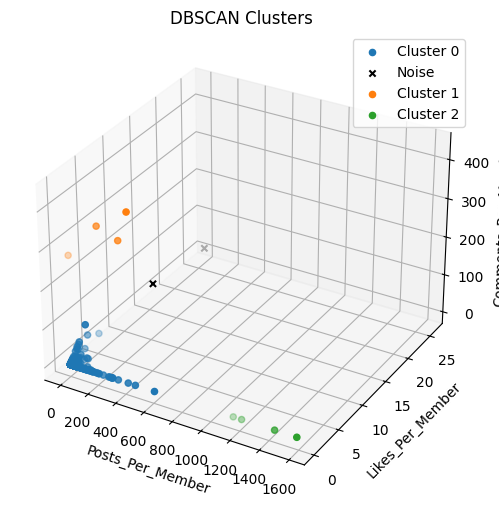

In [41]:
import matplotlib.pyplot as plt

# 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for cluster in df_community_activity_summary['Cluster'].unique():
    cluster_points = df_community_activity_summary[df_community_activity_summary['Cluster'] == cluster]
    if cluster == -1:
        ax.scatter(cluster_points['Posted_By_Per_Member'], cluster_points['Liked_By_Per_Member'], cluster_points['Commented_By_Per_Member'],
                   c='black', marker='x', label='Noise')
    else:
        ax.scatter(cluster_points['Posted_By_Per_Member'], cluster_points['Liked_By_Per_Member'], cluster_points['Commented_By_Per_Member'],
                   label=f'Cluster {cluster}')

ax.set_xlabel('Posts_Per_Member')
ax.set_ylabel('Likes_Per_Member')
ax.set_zlabel('Comments_Per_Member')
ax.set_title('DBSCAN Clusters')
ax.legend()
plt.show()